## REFORMAT DATASET 
- Combining 15 years worth of Natural Disaster Data from the National Oceanic and Atmospheric Administration.
- Restricting dataset to only analyze the tornado sub-group

### Library Imports

In [2]:
#LIBRARY IMPORTS
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing as prep


### Combining Natural Disaster Datasets

In [4]:
#COMBINING ALL THE STORM DETAILS FROM THE YEARS 2007 - 2022
#Initialize the dataset with the details from 2007, first.
NaturalDisaster_Data = pd.read_csv("./Storm Dataset/StormDetails2007.csv")

#Iterate through all the Storm Details years and combine datasets to create one single large one
for year in range(2007, 2023):
    currentYear_Data = pd.read_csv(f"./Storm Dataset/StormDetails{year}.csv")
    NaturalDisaster_Data = pd.concat([NaturalDisaster_Data, currentYear_Data])



In [5]:
#After combining all Nautral disaster data, only keep the Tornado subset of information.
#Side Note: Dimensions = 23,580 Rows;
NaturalDisaster_Data = NaturalDisaster_Data.loc[NaturalDisaster_Data['EVENT_TYPE'] == "Tornado"]

## DATA ANALYSIS / UNDERSTANDING

### Distribution of Data
- Checking the distribution of the data and analyzing specific info about percentage of null values and outliers
- Providing Data Quality Report

In [12]:
#Copying the data into a temporary array to prevent obstructing the original dataset; Printing out info
#SIDE NOTE: WILL GO BACK AND CHANGE THIS TO ORIGINAL WHEN FINISHED WITH ALL CODE

disaster_df = NaturalDisaster_Data.copy(deep=True)
disaster_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23580 entries, 166 to 68702
Data columns (total 51 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   BEGIN_YEARMONTH     23580 non-null  int64  
 1   BEGIN_DAY           23580 non-null  int64  
 2   BEGIN_TIME          23580 non-null  int64  
 3   END_YEARMONTH       23580 non-null  int64  
 4   END_DAY             23580 non-null  int64  
 5   END_TIME            23580 non-null  int64  
 6   EPISODE_ID          23580 non-null  int64  
 7   EVENT_ID            23580 non-null  int64  
 8   STATE               23580 non-null  object 
 9   STATE_FIPS          23580 non-null  int64  
 10  YEAR                23580 non-null  int64  
 11  MONTH_NAME          23580 non-null  object 
 12  EVENT_TYPE          23580 non-null  object 
 13  CZ_TYPE             23580 non-null  object 
 14  CZ_FIPS             23580 non-null  int64  
 15  CZ_NAME             23580 non-null  object 
 16  WF

In [13]:
#Calculating percent of Missing values for each column
#Any columns with greater than 60% missing values will be dropped in pre-processing, Anything less will be dealt with mean imputation
datasetLength = len(disaster_df)
dataColumns = disaster_df.columns.values
df_drop_columns = []
df_impute_columns = []

for column in dataColumns:
    count = disaster_df[column].isnull().sum()
    percent = (count / datasetLength) * 100

    if percent > 0:
        if percent > 60:
            df_drop_columns.append(column) #Columns dropped if missing > 60%
        else:
            df_impute_columns.append(column) #Columns mean imputed

    print(column, ": {Count = ", count, ", Percent = ", percent, "}")

disaster_df = disaster_df.drop(columns= df_drop_columns) #Complete Case Analysis


BEGIN_YEARMONTH : {Count =  0 , Percent =  0.0 }
BEGIN_DAY : {Count =  0 , Percent =  0.0 }
BEGIN_TIME : {Count =  0 , Percent =  0.0 }
END_YEARMONTH : {Count =  0 , Percent =  0.0 }
END_DAY : {Count =  0 , Percent =  0.0 }
END_TIME : {Count =  0 , Percent =  0.0 }
EPISODE_ID : {Count =  0 , Percent =  0.0 }
EVENT_ID : {Count =  0 , Percent =  0.0 }
STATE : {Count =  0 , Percent =  0.0 }
STATE_FIPS : {Count =  0 , Percent =  0.0 }
YEAR : {Count =  0 , Percent =  0.0 }
MONTH_NAME : {Count =  0 , Percent =  0.0 }
EVENT_TYPE : {Count =  0 , Percent =  0.0 }
CZ_TYPE : {Count =  0 , Percent =  0.0 }
CZ_FIPS : {Count =  0 , Percent =  0.0 }
CZ_NAME : {Count =  0 , Percent =  0.0 }
WFO : {Count =  0 , Percent =  0.0 }
BEGIN_DATE_TIME : {Count =  0 , Percent =  0.0 }
CZ_TIMEZONE : {Count =  0 , Percent =  0.0 }
END_DATE_TIME : {Count =  0 , Percent =  0.0 }
INJURIES_DIRECT : {Count =  0 , Percent =  0.0 }
INJURIES_INDIRECT : {Count =  0 , Percent =  0.0 }
DEATHS_DIRECT : {Count =  0 , Percent 

## DATA PRE-PROCESSING
- Dealing with missing values using complete case analysis and mean imputation
- Cleaning up the data in terms of normalization, feature selection, and ordinally categorizing the target variable
- Creating data quality report on cleaned up data and checking visualizations to test distribution

### Feature Selection

In [14]:
#Dropping Columns with irrelevant and repetitive information relating to tornadoes and their magnitude/frequency
irrelevant_cols = ['BEGIN_AZIMUTH', 'END_AZIMUTH', 'BEGIN_LOCATION', 'END_LOCATION', 'CZ_NAME', 
                          'BEGIN_YEARMONTH', 'END_YEARMONTH', 'EVENT_NARRATIVE', 'EPISODE_NARRATIVE']
disaster_df = disaster_df.drop(columns= irrelevant_cols)

#SIDE NOTE:FEATURES THAT WILL POTENTIALLY BE DROPPED AFTER CODE IS CLEANED
# temp_df = temp_df.drop(columns=['BEGIN_DAY','END_YEARMONTH','END_DAY','STATE_FIPS','YEAR','MONTH_NAME',
#                                                           'EVENT_TYPE','CZ_FIPS','END_DATE_TIME', 'FLOOD_CAUSE','CATEGORY',
#                                                           'BEGIN_AZIMUTH','END_AZIMUTH','TOR_OTHER_WFO','TOR_OTHER_CZ_STATE',
#                                                           'TOR_OTHER_CZ_NAME','MAGNITUDE_TYPE', 'EVENT_NARRATIVE', 'EPISODE_NARRATIVE',
#                                                           'BEGIN_DATE_TIME', 'TOR_OTHER_CZ_FIPS', 'BEGIN_LON', 'END_LON', 'MAGNITUDE', 'CZ_TYPE'])

### Transformations

In [15]:
#Encoding the numerical strings of Damage Property And Damage Crops into numerical dollar values
# temp_df["DAMAGE_PROPERTY"] = temp_df["DAMAGE_PROPERTY"].fillna(0.0)
# temp_df["DAMAGE_CROPS"] = temp_df["DAMAGE_CROPS"].fillna(0.0)

def transform_DamageCost(damage_data, damage_column):
    damage = pd.DataFrame(damage_data)
    for index,row in damage.iterrows():
        if type(row[damage_column]) != type(0.0):
            cost = row[damage_column]
            if cost[-1:] == 'B':
                row[damage_column] = float(cost[:-1])*1000000000
            elif cost[-1:] == 'M':
                row[damage_column] = float(cost[:-1])*1000000
            elif cost[-1:] == 'K':
                row[damage_column] = float(cost[:-1])*1000

    return damage

disaster_df["DAMAGE_PROPERTY"] = transform_DamageCost(disaster_df["DAMAGE_PROPERTY"], "DAMAGE_PROPERTY")
disaster_df["DAMAGE_CROPS"] = transform_DamageCost(disaster_df["DAMAGE_CROPS"], "DAMAGE_CROPS")

#Converting the data type
disaster_df['DAMAGE_PROPERTY'] = disaster_df['DAMAGE_PROPERTY'].astype('float') 
disaster_df['DAMAGE_CROPS'] = disaster_df['DAMAGE_CROPS'].astype('float')

In [16]:
#Transforming the TOR_F_Scale into numerical, ordinal data that takes into account the magnitude of the tornadoes
#Ordinal Values: EF0 = 0 --> EF5 = 5
tornado_scale = pd.DataFrame(disaster_df["TOR_F_SCALE"])

for index, row in tornado_scale.iterrows():
    scale = row["TOR_F_SCALE"]
    if scale[-1:] == '0' or scale[-1:] == 'U':
        row["TOR_F_SCALE"] = 0
    elif scale[-1:] == '1':
        row["TOR_F_SCALE"] = 1
    elif scale[-1:] == '2':
        row["TOR_F_SCALE"] = 2
    elif scale[-1:] == '3':
        row["TOR_F_SCALE"] = 3
    elif scale[-1:] == '4':
        row["TOR_F_SCALE"] = 4
    elif scale[-1:] == '5':
        row["TOR_F_SCALE"] = 5

disaster_df["TOR_F_SCALE"] = tornado_scale
disaster_df['TOR_F_SCALE'] = disaster_df['TOR_F_SCALE'].astype('int') #Converting the data type

### Missing Values And Outliers

In [17]:
df_impute_columns = list(set(df_impute_columns) - set(irrelevant_cols))
for column in df_impute_columns:
    df_mean = disaster_df[column].mean()
    disaster_df[column] = disaster_df[column].fillna(df_mean) #Mean Imputation
    

In [19]:
disaster_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23580 entries, 166 to 68702
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BEGIN_DAY          23580 non-null  int64  
 1   BEGIN_TIME         23580 non-null  int64  
 2   END_DAY            23580 non-null  int64  
 3   END_TIME           23580 non-null  int64  
 4   EPISODE_ID         23580 non-null  int64  
 5   EVENT_ID           23580 non-null  int64  
 6   STATE              23580 non-null  object 
 7   STATE_FIPS         23580 non-null  int64  
 8   YEAR               23580 non-null  int64  
 9   MONTH_NAME         23580 non-null  object 
 10  EVENT_TYPE         23580 non-null  object 
 11  CZ_TYPE            23580 non-null  object 
 12  CZ_FIPS            23580 non-null  int64  
 13  WFO                23580 non-null  object 
 14  BEGIN_DATE_TIME    23580 non-null  object 
 15  CZ_TIMEZONE        23580 non-null  object 
 16  END_DATE_TIME      2

In [ ]:
#SIDE NOTE: ENCODING CATEGORICAL DATA, WILL BE FIXED AFTER CODE CLEAN UP
#Transforming label data into encoded, numerical data types
# labelEn = prep.LabelEncoder()
# temp_df['STATE'] = labelEn.fit_transform(temp_df['STATE'])
# temp_df['CZ_NAME'] = labelEn.fit_transform(temp_df['CZ_NAME'])
# temp_df['WFO'] = labelEn.fit_transform(temp_df['WFO'])
# temp_df['CZ_TIMEZONE'] = labelEn.fit_transform(temp_df['CZ_TIMEZONE'])
# temp_df['SOURCE'] = labelEn.fit_transform(temp_df['SOURCE'])
# temp_df['BEGIN_LOCATION'] = labelEn.fit_transform(temp_df['BEGIN_LOCATION'])
# temp_df['END_LOCATION'] = labelEn.fit_transform(temp_df['END_LOCATION'])
# temp_df['DATA_SOURCE'] = labelEn.fit_transform(temp_df['DATA_SOURCE'])

# temp_df['DAMAGE_PROPERTY'] = temp_df['DAMAGE_PROPERTY'].astype('float') 
# temp_df['DAMAGE_CROPS'] = temp_df['DAMAGE_CROPS'].astype('float')
# temp_df['TOR_F_SCALE'] = temp_df['TOR_F_SCALE'].astype('int')

# #Filling all missing data with zeroes
# temp_df["BEGIN_RANGE"] = temp_df["BEGIN_RANGE"].fillna(0.0)
# temp_df["END_RANGE"] = temp_df["END_RANGE"].fillna(0.0)
# temp_df["BEGIN_LAT"] = temp_df["BEGIN_LAT"].fillna(0.0)
# temp_df["END_LAT"] = temp_df["END_LAT"].fillna(0.0)

### Normalization


In [ ]:
#normalizing dataframe
##SIDE NOTE:
# Normalize the data in order to test a Gaussian Classifier to determine the magnitue of the tornadoes and 
#Also implement a distance based classifier to determine the amount of damage that will be incurred from the tornadoes based on magnitude, intensity, size etc.
# To do this, we'll have to perform normalization to remove the skewed distribition and any effects caused by outliers 
temp_df.apply(lambda iterator: ((iterator - iterator.mean())/iterator.std()).round(2))

## DISPLAYING DATAFRAME VISUALS ------------------------------------------------------

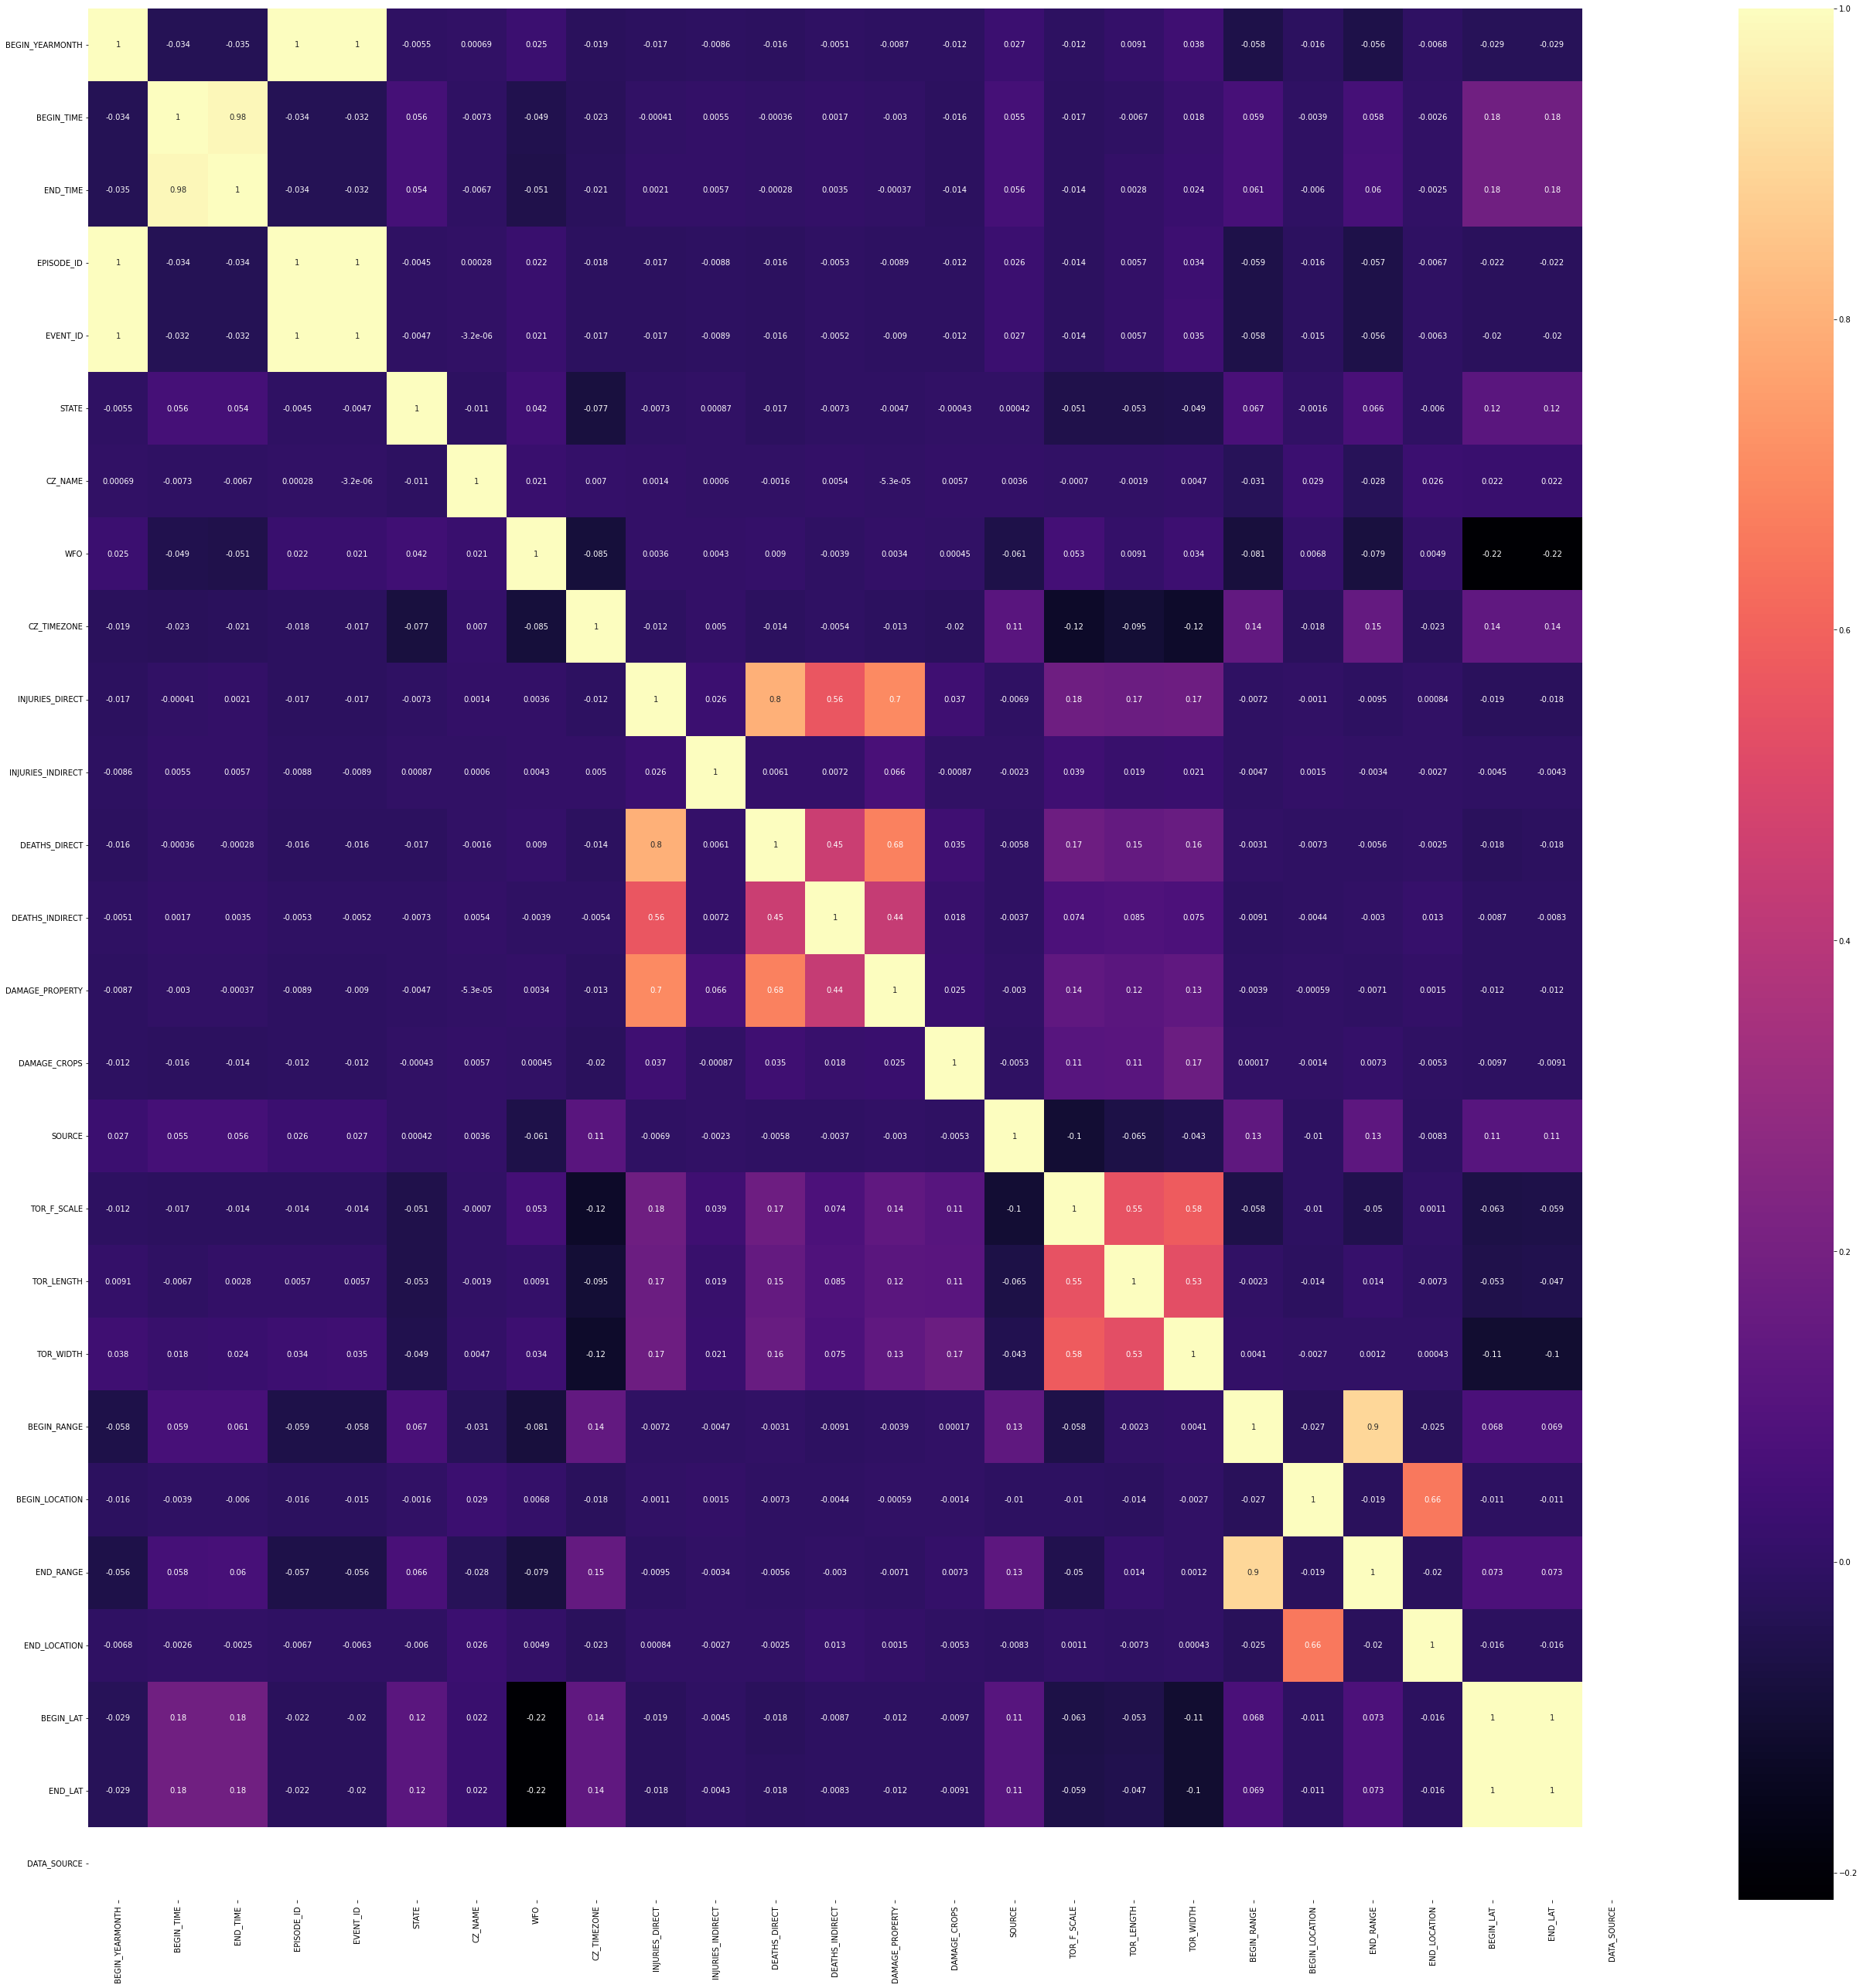

In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



X = temp_df.iloc[:,0:37]
y = temp_df['TOR_F_SCALE']
#get correlations of each features in dataset
corrmat = temp_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(45,45))
#plot heat map
g=sns.heatmap(temp_df[top_corr_features].corr(),annot=True,cmap="magma")

In [113]:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#Columns
X = temp_df.iloc[:, 0:30]
y = temp_df['TOR_F_SCALE']

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

              Specs         Score
13  DAMAGE_PROPERTY  2.106358e+12
14     DAMAGE_CROPS  1.363631e+09
4          EVENT_ID  2.430188e+07
3        EPISODE_ID  4.013504e+06
18        TOR_WIDTH  3.970168e+06
9   INJURIES_DIRECT  6.723610e+05
11    DEATHS_DIRECT  1.436125e+05
17       TOR_LENGTH  4.157433e+04
16      TOR_F_SCALE  2.449341e+04
20   BEGIN_LOCATION  2.040446e+04


In [114]:
classifier_DisasterDf = temp_df[['DAMAGE_PROPERTY', 'DAMAGE_CROPS', 'EVENT_ID', 'EPISODE_ID', 'TOR_WIDTH', 'INJURIES_DIRECT','DEATHS_DIRECT','TOR_LENGTH',
                                'TOR_F_SCALE','INJURIES_INDIRECT','DEATHS_INDIRECT','BEGIN_LOCATION','END_LOCATION']]
classifier_DisasterDf.head()

DAMAGE_PROPERTY  DAMAGE_CROPS  EVENT_ID  EPISODE_ID  TOR_WIDTH  \
166          20000.0           0.0     45063        7822       30.0   
263              0.0           0.0     22128        3951      300.0   
558              0.0           0.0     22131        3951       50.0   
656         180000.0           0.0     64108       11659      150.0   
736          20000.0           0.0     25721        4525       30.0   

     INJURIES_DIRECT  DEATHS_DIRECT  TOR_LENGTH  TOR_F_SCALE  \
166                0              0        0.55            0   
263                0              0        1.50            2   
558                0              0        0.20            1   
656                0              0        3.47            1   
736                0              0        0.15            0   

     INJURIES_INDIRECT  DEATHS_INDIRECT  BEGIN_LOCATION  END_LOCATION  
166                  0                0           10216         10240  
263                  0                0             804           794  
558                  0                0           10229         10251  
656                  0                0            6434          7173  
736                  0                0            9959          9991

## DATA CLASSIFIER ------------------------------------------------

In [115]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

In [121]:
# Split the data into features (X) and target (y)
X = classifier_DisasterDf.drop('TOR_F_SCALE', axis=1)
y = classifier_DisasterDf['TOR_F_SCALE']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7309160305343512


In [122]:
#Confusion Matrix
cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
cm

0     1    2   3  4  5
0  2141   385    1   0  0  0
1   428  1097   82   3  0  0
2    21   221  162  12  0  0
3     2    40   48  42  4  0
4     0     2    6  12  4  0
5     0     0    1   0  1  1

In [123]:
#EVALUATING THE CLASSIFIER
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
	
print('Precision: %.3f' % precision_score(y_test, y_pred, average='micro'))
print('Recall: %.3f' % recall_score(y_test, y_pred, average = 'micro'))
print('F1 Score: %.3f' % f1_score(y_test, y_pred, average = 'micro'))

Precision: 0.731
Recall: 0.731
F1 Score: 0.731
